In [ ]:
!pip install langchain langchain_community
!pip install replicate

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Baca file CSV
df = pd.read_csv('/content/StudentMentalHealth.csv')

# Lihat 5 data pertama
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


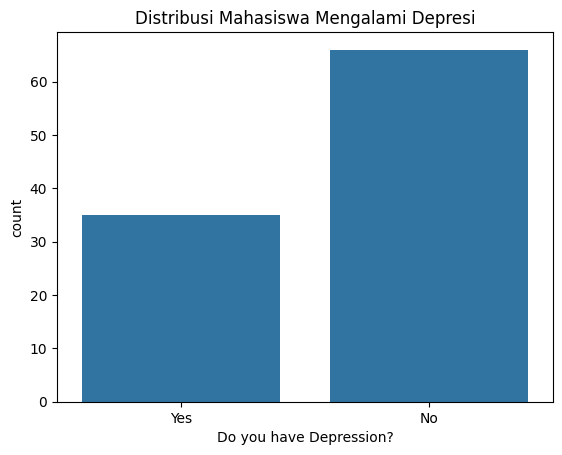

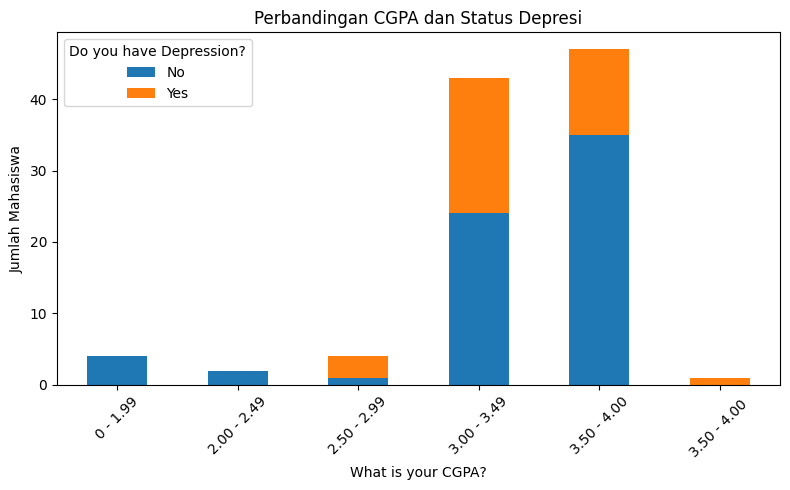

In [12]:
# Distribusi Depresi
sns.countplot(x='Do you have Depression?', data=df)
plt.title('Distribusi Mahasiswa Mengalami Depresi')
plt.show()
# Hubungan CGPA dan Depresi
cgpa_depression = df.groupby(['What is your CGPA?', 'Do you have Depression?']).size().unstack(fill_value=0)
cgpa_depression.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Perbandingan CGPA dan Status Depresi')
plt.ylabel('Jumlah Mahasiswa')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📈 Insight Awal
- Sebagian besar mahasiswa dengan CGPA 3.00–3.49 menunjukkan gejala depresi.
- Banyak yang belum mengakses layanan bantuan profesional.


In [18]:
from langchain_community.llms import Replicate
import os

api_token = "r8_5jMr5sexKq6EY7RgQ7Paapi8XiWRIC213Vdiq"

os.environ["REPLICATE_API_TOKEN"] = api_token

output = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    replicate_api_token=api_token,
)

In [19]:
prompt = """
Saya memiliki data tentang mahasiswa, termasuk CGPA dan apakah mereka mengalami depresi.
Buatlah insight dan rekomendasi untuk institusi kampus berdasarkan data ini.
"""

response = output.invoke(prompt)
print("🧠 AI Insight:\n")
print(response)


🧠 AI Insight:

Untuk membangun insight dan rekomendasi berdasarkan data CGPA dan depresi mahasiswa, kita harus melakukan analisis yang kuat dan etis. Berikut adalah langkah-langkah dan panduan yang dapat digunakan untuk menghasilkan hasil yang bertanggung jawab dan bermanfaat:

1. **Data Pembersihan**: Pastikan data CGPA dan status depresi mahasiswa sudah diverifikasi untuk kebenaran dan konsistensi. Hanya mengambil data yang valid dan relevan.

2. **Analisis Statistik**:
   - **Korelasi**: Lakukan analisis korelasi antara CGPA dan depresi. Ini akan membantu menentukan apakah ada hubungan negatif atau positif antara kedua faktor.
   - **Analisis Deskriptif**: Jelaskan rangkuman statistik deskriptif seperti rata-rata, varians, dan pangkat frekuensi untuk CGPA dan depresi.
   - **Test Hipotesis**: Jika diperlukan, lakukan uji hipotesis untuk menentukan statistik yang signifikan antara CGPA dan depresi.

3. **Segmentasi**: Jika data cukup besar, pertimbangkan untuk mengelompokkan mahasisw

## ✅ Rekomendasi
- Kampus perlu menyediakan layanan konseling yang mudah diakses dan bebas stigma.
- Edukasi tentang kesehatan mental harus diberikan sejak awal perkuliahan.
- Perlu ada monitoring berkala pada mahasiswa dengan CGPA menurun.
